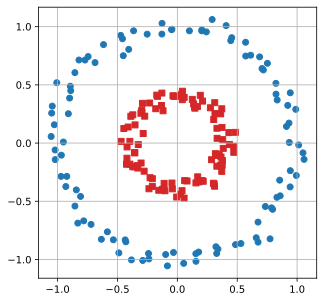

In [1]:
# https://learn.qiskit.org/course/machine-learning/quantum-feature-maps-kernels

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.datasets import make_circles

# Create circles dataset
X, Y = make_circles(n_samples=200, noise=0.05, factor=0.4)

# Separate smaller and larger circles
A = X[np.where(Y==0)]
B = X[np.where(Y==1)]

# Plot in 2D
plt.figure(figsize=(5,5))
plt.scatter(A[:,0],A[:,1], marker='o')
plt.scatter(B[:,0],B[:,1], marker='s', c='C3')
plt.grid()
plt.show()

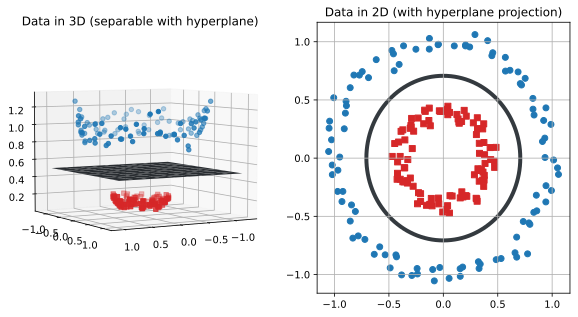

In [2]:
def transform_function(x, y):
    """ Implements f(x,y) = [x, y, z = x^2 + y^2] """
    return np.array([x, y, x**2.0 + y**2.0])

# Transform
A1 = np.array([transform_function(x, y) for
               x, y in zip(np.ravel(A[:,0]), np.ravel(A[:,1]))])
B1 = np.array([transform_function(x, y)
               for x, y in zip(np.ravel(B[:,0]), np.ravel(B[:,1]))])

# Plot in 3D
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
ax.set_title("Data in 3D (separable with hyperplane)")
ax.scatter(A1[:,0], A1[:,1], A1[:,2], marker='o')
ax.scatter(B1[:,0], B1[:,1], B1[:,2], marker='s', c='C3')  # make red
ax.view_init(5, 60)
x = np.arange(-1.25, 1.25, 0.25)
y = np.arange(-1.25, 1.25, 0.26)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z[:,:] = 0.5
ax.plot_surface(X, Y, Z, color='#343A3F')

# Project data to 2D
ax2d = fig.add_subplot(122)
ax2d.set_title("Data in 2D (with hyperplane projection)")
ax2d.scatter(A1[:,0], A1[:,1], marker='o')
ax2d.scatter(B1[:,0], B1[:,1], marker='s',
            c='C3')  # make red
ax2d.add_patch(pl.Circle((0,0), radius=np.sqrt(0.5),
               fill=False, linestyle='solid', linewidth=4.0,
               color='#343A3F'))
plt.grid()
plt.show()

In [3]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [4]:
A_label = -np.ones(A.shape[0], dtype=int)
B_label = np.ones(B.shape[0], dtype=int)
X = np.concatenate([A, B])
y = np.concatenate([A_label, B_label])

after fitted: svm.gamma='scale' svm._gamma=1.715041566868032, svm.coef0=0.0


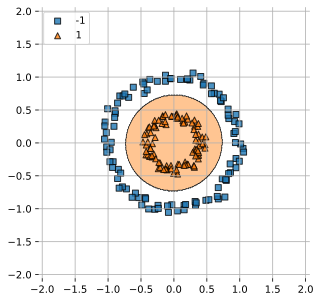

In [5]:
# https://github.com/scikit-learn/scikit-learn/blob/1.1.2/sklearn/svm/src/libsvm/svm.cpp#L342-L345
svm = SVC(kernel='poly', degree=2)
svm.fit(X, y)
# https://github.com/scikit-learn/scikit-learn/blob/1.1.2/sklearn/svm/_base.py#L219-L222
# X_var = X.var()
# _gamma = 1.0 / (X.shape[1] * X_var) if X_var != 0 else 1.0
print(f'after fitted: {svm.gamma=} {svm._gamma=}, {svm.coef0=}')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fig = plot_decision_regions(X, y, clf=svm, ax=ax)
plt.legend(loc='upper left')
ax.set_aspect('equal')
plt.grid()
plt.show()